# Ejercicio 26
Se abre la válvula y se quita las trabas alcanzándose un nuevo estado de equilibrio. Determinar:
1. Presión, Temperatura y $x$ (si corresponde)
2. Trabajo intercambiado con el medio exterior
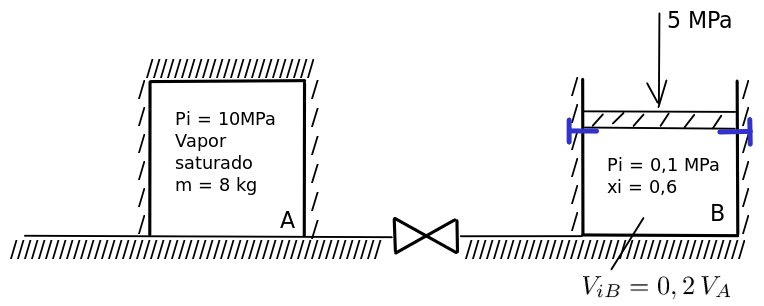

## Solución

In [ ]:
!pip install CoolProp
import CoolProp.CoolProp as cp

     |████████████████████████████████| 4.2 MB 4.2 MB/s 


In [ ]:
# Datos:
P_Ai = 10e6 # Pa
x_Ai = 1
m_Ai = 8 # kg/s
P_Bi = 0.1e6 # Pa
x_Bi = 0.6
P_f = 5e6 # Pa

$\left\{
\begin{array}{l}
P_{Ai} = 10 \, \mbox{MPa} \\
x = 1
\end{array}
\right. \qquad \wedge \qquad m = 8 \, \mbox{kg}$

In [ ]:
# Recipiente A (estado inicial)
v_Ai = 1/cp.PropsSI('D','P',P_Ai,'Q',x_Ai,'Water')
T_Ai = cp.PropsSI('T','P',P_Ai,'Q',x_Ai,'Water')
u_Ai = cp.PropsSI('U','P',P_Ai,'Q',x_Ai,'Water')

# Volumen del recipiente A
V_A = m_Ai*v_Ai 
# Energía interna inicial en A
U_Ai = m_Ai*u_Ai

In [ ]:
#@title
print('v_Ai = %.5f m^3'%v_Ai)
print('T_Ai = %.2f K'%T_Ai)
print('t_Ai = %.2f°C'%(T_Ai - 273.15))
print('u_Ai = %.2f kJ/kg'%(u_Ai/1000))
print('V_A = %.5f m^3'%V_A)
print('V_A = %.2f litros'%(V_A*1000))
print('U_Ai = %.2f kJ'%(U_Ai/1000))

v_Ai = 0.01803 m^3
T_Ai = 584.15 K
t_Ai = 311.00°C
u_Ai = 2545.19 kJ/kg
V_A = 0.14424 m^3
V_A = 144.24 litros
U_Ai = 20361.54 kJ


$$ v_{Bi} = x_{Bi} \, (v'' - v') + v' $$

In [ ]:
vp1 = 1/cp.PropsSI('D','P',P_Bi,'Q',0,'Water')  # (v')
vp2 = 1/cp.PropsSI('D','P',P_Bi,'Q',1,'Water')  # (v'')
# Volumen específico inicial en B
v_Bi = x_Bi*(vp2 - vp1) + vp1

In [ ]:
#@title 
print('v_Bi = %.5f m^3'%v_Bi)

v_Bi = 1.01677 m^3


In [ ]:
# o también
v_Bi = 1 / cp.PropsSI('D','P',P_Bi,'Q',x_Bi,'Water')

In [ ]:
#@title 
print('v_Bi = %.5f m^3'%v_Bi)

v_Bi = 1.01677 m^3


$$ V_{Bi} = m_{Bi} \cdot v_{Bi}  $$

Despejo $m_{Bi}$
$$ m_{Bi} = \frac{V_{Bi}}{v_{Bi}} $$

In [ ]:
# Recipiente B (estado inicial)
V_Bi = 0.2*V_A
m_Bi = V_Bi/v_Bi

In [ ]:
#@title
print('V_Bi = %.5f m^3'%V_Bi)
print('m_Bi = %.5f kg'%m_Bi)

V_Bi = 0.02885 m^3
m_Bi = 0.02837 kg


$$ u = x \, (u'' - u') + u' $$

In [ ]:
up1 = cp.PropsSI('U','P',P_Bi,'Q',0,'Water')  # (u')
up2 = cp.PropsSI('U','P',P_Bi,'Q',1,'Water')  # (u'')
# Energía interna específica inicial en B
u_Bi = x_Bi*(up2 - up1) + up1

In [ ]:
#@title 
print('u_Bi = %.2f kJ/kg'%(u_Bi/1000))

u_Bi = 1670.29 kJ/kg


In [ ]:
# o también
u_Bi = cp.PropsSI('U','P',P_Bi,'Q',x_Bi,'Water')

In [ ]:
#@title
print('u_Bi = %.2f kJ/kg'%(u_Bi/1000))

u_Bi = 1670.29 kJ/kg


In [ ]:
# Energía interna inicial en B
U_Bi = m_Bi*u_Bi

In [ ]:
#@title 
print('U_Bi = %.2f kJ'%(U_Bi/1000))

U_Bi = 47.39 kJ


$$ Q = \Delta U + W_{\Delta V} $$

Estado inicial
$$ 0 = U_i + 0 $$

Estado final
$$ 0 = U + W_{\Delta V} = H_f $$

Entonces
$$ H_f = U_{Ai} + U_{Bi} $$

$$ h_f = \frac{U_{Ai} + U_{Bi}}{m_{t}} $$

In [ ]:
H_f = U_Ai + U_Bi
m_t = m_Ai + m_Bi
h_f = (U_Ai + U_Bi)/m_t

In [ ]:
#@title 
print('h_f = %.2f kJ/kg'%(h_f/1000))

h_f = 2542.10 kJ/kg


In [ ]:
cp.PhaseSI('P',P_f,'H',h_f,'Water')

'twophase'

In [ ]:
x_f = cp.PropsSI('Q','P',P_f,'H',h_f,'Water')
T_f = cp.PropsSI('T','P',P_f,'H',h_f,'Water')
v_f = 1 / cp.PropsSI('D','P',P_f,'H',h_f,'Water')
V_f = m_t*v_f
V_Bf = V_f - V_A
W_DV = P_f*(V_Bf - V_Bi)

In [ ]:
#@title
print('x_f = %.2f'%x_f)
print('T_f = %.2f K'%T_f)
print('t_f = %.2f°C'%(T_f - 273.15))
print('v_f = %.5f m^3/kg'%v_f)
print('V_f = %.5f m^3'%V_f)
print('V_Bf = %.5f m^3'%V_Bf)
print('W_DV = %.2f kJ'%(W_DV/1000))

x_f = 0.85
T_f = 537.09 K
t_f = 263.94°C
v_f = 0.03358 m^3/kg
V_f = 0.26958 m^3
V_Bf = 0.12534 m^3
W_DV = 482.46 kJ
